In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [40]:
d = pd.read_excel("../data/esolmet.xlsx",skiprows=[0,1,3,4],index_col=0,parse_dates=True)
# data
# d

In [41]:
data = d.Global.truncate(before="2020-05-01",after="2020-05-10 23:59:00")
data = np.array(data)
data = (data - data.mean())/data.std()

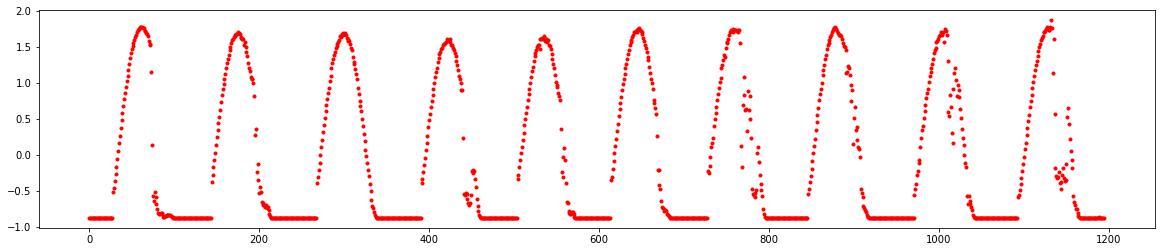

In [42]:
fig, ax = plt.subplots(figsize=(20,4))

ax.plot(data,"r.")

In [43]:
# T =  150   # 10 valores para predecir el siguiente
# X = []
# Y = []

# for t in range(len(series)-T):
#     x = series[t:t+T]
#     X.append(x)
#     y = series[t+T]
#     Y.append(y)
    
# # print(X)
# X = np.array(X).reshape(-1,T)    
# Y = np.array(Y)
# N = len(X)

# print(X.shape)
# print(Y.shape)

In [44]:
T = 100
X = []
Y = []

for t in range(len(data)-T):
    x = data[t:t+T]
    X.append(x)
    y = data[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)


In [45]:
Y

array([-0.87936911, -0.87936911, -0.87936911, ..., -0.87887732,
       -0.87936911, -0.87936911])

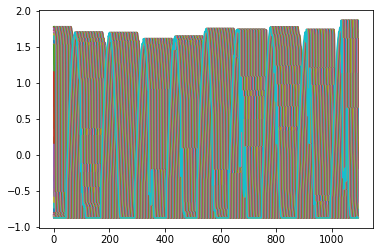

In [46]:
plt.plot(X);

In [47]:
# plt.plot(X.flatten());

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T,)),
    tf.keras.layers.Dense(158,activation="sigmoid"),
    tf.keras.layers.Dense(158,activation="sigmoid"),
    tf.keras.layers.Dense(158,activation="sigmoid"),
    tf.keras.layers.Dense(158,activation="sigmoid"),
    tf.keras.layers.Dense(1),
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss="mse")
r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:]),
)

Epoch 1/80
18/18 [==============================] - 0s 9ms/step - loss: 3.5314 - val_loss: 0.9624
Epoch 2/80
18/18 [==============================] - 0s 5ms/step - loss: 0.9742 - val_loss: 0.6972
Epoch 3/80
18/18 [==============================] - 0s 4ms/step - loss: 0.4647 - val_loss: 0.2093
Epoch 4/80
18/18 [==============================] - 0s 4ms/step - loss: 0.0987 - val_loss: 0.1006
Epoch 5/80
18/18 [==============================] - 0s 4ms/step - loss: 0.0440 - val_loss: 0.0939
Epoch 6/80
18/18 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.0679
Epoch 7/80
18/18 [==============================] - 0s 4ms/step - loss: 0.0249 - val_loss: 0.0884
Epoch 8/80
18/18 [==============================] - 0s 4ms/step - loss: 0.0596 - val_loss: 0.0844
Epoch 9/80
18/18 [==============================] - 0s 4ms/step - loss: 0.0347 - val_loss: 0.0668
Epoch 10/80
18/18 [==============================] - 0s 5ms/step - loss: 0.0316 - val_loss: 0.0701
Epoch 11/80
18/18 [

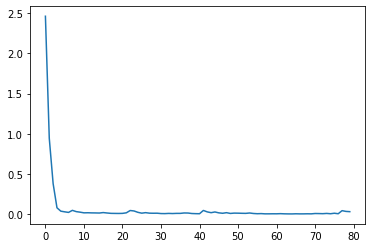

In [61]:
plt.plot(r.history["loss"])

In [62]:
validation_target = Y[-N//2:]
validation_prediction = []

last_x  = X[-N//2]

while len(validation_prediction) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    # update the prediction list
    validation_prediction.append(p)
    #make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1] = p


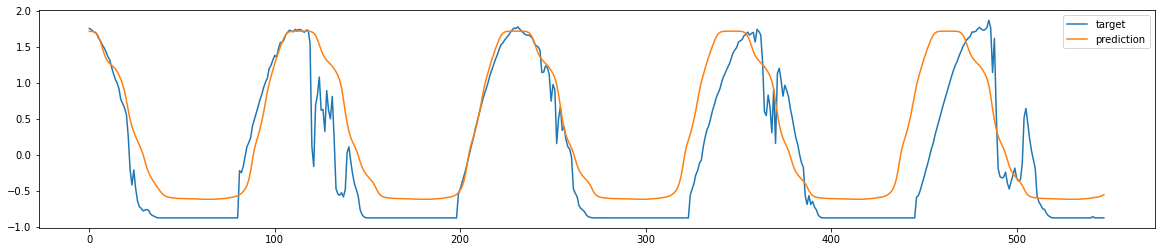

In [63]:
plt.figure(figsize=(20,4))
plt.plot(validation_target,label="target")
plt.plot(validation_prediction,label="prediction")
plt.legend()